In [232]:
import matplotlib.pyplot as plt

In [233]:
import cv2

In [234]:
im = cv2.imread('timesquare.jpg') #Reads an image into BGR Format
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)
type(im.shape)
first = im.shape[0]
second = im.shape[1]

(853, 1280, 3)


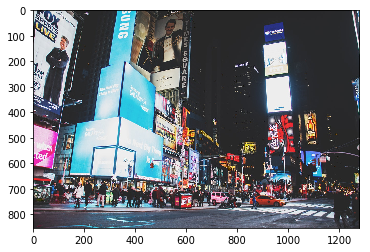

In [235]:
plt.imshow(im)
plt.show()

In [236]:
#Flatten each channel to the image
all_pixels = im.reshape((-1, 3))
print(all_pixels.shape)

(1091840, 3)


In [237]:
from sklearn.cluster import KMeans

In [238]:
dominant_colors = 2

km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [239]:
centers = km.cluster_centers_

In [240]:
import numpy as np
centers = np.array(centers, dtype = 'uint8')

In [241]:
print(centers)

[[ 55  53  59]
 [181 203 212]]


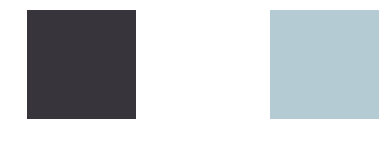

In [242]:
#Plot what all colors are these?
i = 1
plt.figure(0, figsize = (8,2))

colors = []

for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color swatch
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()
     

In [243]:
#Segment Our Original Image
new_img = np.zeros((first*second, 3), dtype = 'uint8')

print(new_img.shape)

(1091840, 3)


In [244]:
colors

[array([55, 53, 59], dtype=uint8), array([181, 203, 212], dtype=uint8)]

In [245]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0])

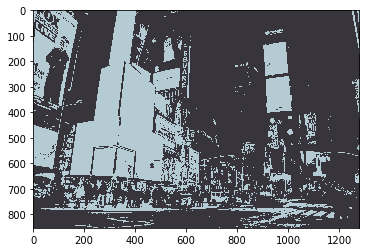

In [246]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
#plt.imshow(im)
plt.imshow(new_img)
plt.show()